## Telecom Churn: Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [72]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.color_palette("YlGnBu", 10)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## 1. Reading and understanding the dataset

In [2]:
data = pd.read_csv('./telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
data.shape

(99999, 226)

In [4]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# Dropping ID Cols
data = data.drop(columns=['mobile_number', 'circle_id'])

## 2. Handling missing data

We define a function `get_null_cols()` here that can be reused further to get the list of columns that have `null`s

In [7]:
def get_null_cols(df):
    columns_with_null = round(df.isnull().sum()/len(df) * 100, 2)
    null_cols = columns_with_null[columns_with_null > 0]
    null_cols.sort_values(inplace=True)

    return null_cols

In [8]:
get_null_cols(data)

last_date_of_month_7         0.60
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_8         1.10
date_of_last_rech_6          1.61
last_date_of_month_9         1.66
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
std_ic_t2t_mou_7             3.86
loc_og_t2f_mou_7             3.86
loc_ic_mou_7                 3.86
loc_ic_t2f_mou_7             3.86
loc_og_t2c_mou_7             3.86
loc_ic_t2m_mou_7             3.86
loc_ic_t2t_mou_7             3.86
isd_og_mou_7                 3.86
og_others_7                  3.86
std_og_t2t_mou_7             3.86
spl_og_mou_7                 3.86
loc_og_t2m_mou_7             3.86
std_og_t2m_mou_7             3.86
std_og_mou_7                 3.86
std_og_t2f_mou_7             3.86
loc_og_mou_7                 3.86
std_og_t2c_mou_7             3.86
std_ic_t2m_mou_7             3.86
std_ic_t2f_mou_7             3.86
onnet_mou_7                  3.86
loc_og_t2t_mou

In [9]:
get_null_cols(data).shape

(166,)

### Types of columns

In [10]:
# Date columns

date_cols = [col for col in data.columns if 'date' in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [11]:
# Categorical cols

cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

data[cat_cols].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Numerical columns

number_cols = [col for col in data.columns if col not in date_cols + cat_cols]

number_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

### 2.1 Zero Impute

There are columns that have recharge details where at some rows the data is missing, it is seen that the last activity date on the row is also missing that means the user didn't recharge the number for that month is why the `Nan`s can be replaced with `zero`.
 

Here zero would mean that there was no usage by the user for that variable.

In [13]:
cols_impute_with_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9','max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

data[cols_impute_with_zero] = data[cols_impute_with_zero].apply(lambda x: x.fillna(0))

**Checking the null after zero imputation**

In [14]:
get_null_cols(data)

last_date_of_month_7         0.60
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_8         1.10
date_of_last_rech_6          1.61
last_date_of_month_9         1.66
date_of_last_rech_7          1.77
date_of_last_rech_8          3.62
std_ic_t2f_mou_7             3.86
std_og_t2m_mou_7             3.86
loc_ic_t2m_mou_7             3.86
std_ic_t2o_mou_7             3.86
std_og_t2f_mou_7             3.86
std_ic_mou_7                 3.86
loc_og_t2c_mou_7             3.86
std_og_t2t_mou_7             3.86
std_ic_t2m_mou_7             3.86
isd_og_mou_7                 3.86
std_og_mou_7                 3.86
std_ic_t2t_mou_7             3.86
loc_og_t2f_mou_7             3.86
loc_ic_mou_7                 3.86
spl_og_mou_7                 3.86
og_others_7                  3.86
loc_ic_t2f_mou_7             3.86
loc_ic_t2t_mou_7             3.86
std_og_t2c_mou_7             3.86
spl_ic_mou_7                 3.86
loc_og_mou_7  

In [15]:
# Dropping date columns

data = data.drop(columns=date_cols)

### 2.2 Imputing categorical variables

The `null`s in the categorical columns can be replaced with say `-1` to create a new category in each variables


In [16]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [17]:
data.shape

(99999, 212)

In [18]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.04

In [19]:
get_null_cols(data)

loc_og_t2o_mou       1.02
std_og_t2o_mou       1.02
loc_ic_t2o_mou       1.02
loc_og_t2m_mou_7     3.86
loc_ic_mou_7         3.86
loc_ic_t2f_mou_7     3.86
loc_og_t2f_mou_7     3.86
loc_ic_t2m_mou_7     3.86
loc_og_t2c_mou_7     3.86
loc_ic_t2t_mou_7     3.86
loc_og_mou_7         3.86
std_ic_t2t_mou_7     3.86
spl_og_mou_7         3.86
isd_og_mou_7         3.86
std_og_t2t_mou_7     3.86
std_og_mou_7         3.86
std_og_t2m_mou_7     3.86
std_og_t2c_mou_7     3.86
og_others_7          3.86
loc_og_t2t_mou_7     3.86
std_og_t2f_mou_7     3.86
offnet_mou_7         3.86
ic_others_7          3.86
onnet_mou_7          3.86
std_ic_t2f_mou_7     3.86
roam_og_mou_7        3.86
std_ic_t2m_mou_7     3.86
std_ic_t2o_mou_7     3.86
spl_ic_mou_7         3.86
isd_ic_mou_7         3.86
std_ic_mou_7         3.86
roam_ic_mou_7        3.86
spl_og_mou_6         3.94
std_ic_t2m_mou_6     3.94
ic_others_6          3.94
std_og_mou_6         3.94
isd_ic_mou_6         3.94
isd_og_mou_6         3.94
loc_ic_t2t_m

In [20]:
# Dropping columns with more than 70% missing values

nulls = get_null_cols(data)
high_missing_drop = nulls[nulls > 70].index
data = data.drop(columns=high_missing_drop)

data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0

In [21]:
knn_imput_cols = get_null_cols(data).index

data[knn_imput_cols].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,loc_og_t2m_mou_7,loc_ic_mou_7,loc_ic_t2f_mou_7,loc_og_t2f_mou_7,loc_ic_t2m_mou_7,loc_og_t2c_mou_7,loc_ic_t2t_mou_7,loc_og_mou_7,std_ic_t2t_mou_7,spl_og_mou_7,std_og_t2t_mou_7,isd_og_mou_7,std_og_mou_7,std_og_t2m_mou_7,std_og_t2c_mou_7,og_others_7,loc_og_t2t_mou_7,std_og_t2f_mou_7,ic_others_7,onnet_mou_7,std_ic_t2f_mou_7,roam_og_mou_7,std_ic_t2o_mou_7,isd_ic_mou_7,roam_ic_mou_7,std_ic_mou_7,std_ic_t2m_mou_7,offnet_mou_7,spl_ic_mou_7,std_ic_t2m_mou_6,std_og_mou_6,ic_others_6,isd_ic_mou_6,spl_og_mou_6,loc_ic_t2t_mou_6,spl_ic_mou_6,loc_ic_t2m_mou_6,std_ic_mou_6,loc_ic_t2f_mou_6,std_ic_t2o_mou_6,loc_ic_mou_6,std_og_t2c_mou_6,std_ic_t2f_mou_6,og_others_6,std_ic_t2t_mou_6,isd_og_mou_6,loc_og_t2c_mou_6,onnet_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,roam_ic_mou_6,std_og_t2m_mou_6,loc_og_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,std_og_t2f_mou_6,offnet_mou_6,std_og_t2t_mou_6,loc_ic_t2m_mou_8,loc_og_t2f_mou_8,loc_ic_t2f_mou_8,std_og_t2f_mou_8,std_ic_mou_8,loc_ic_mou_8,std_ic_t2o_mou_8,std_ic_t2t_mou_8,loc_og_t2t_mou_8,std_ic_t2m_mou_8,roam_ic_mou_8,loc_og_t2m_mou_8,loc_ic_t2t_mou_8,ic_others_8,onnet_mou_8,std_og_t2m_mou_8,std_og_t2c_mou_8,isd_ic_mou_8,std_og_mou_8,roam_og_mou_8,std_og_t2t_mou_8,isd_og_mou_8,std_ic_t2f_mou_8,spl_og_mou_8,spl_ic_mou_8,loc_og_mou_8,og_others_8,offnet_mou_8,loc_og_t2c_mou_8,std_ic_t2o_mou_9,onnet_mou_9,roam_ic_mou_9,isd_ic_mou_9,offnet_mou_9,std_ic_t2f_mou_9,spl_ic_mou_9,std_ic_mou_9,loc_og_t2m_mou_9,std_ic_t2m_mou_9,std_og_t2f_mou_9,std_og_t2m_mou_9,std_og_t2c_mou_9,std_og_t2t_mou_9,std_og_mou_9,isd_og_mou_9,loc_og_mou_9,spl_og_mou_9,og_others_9,loc_og_t2c_mou_9,loc_ic_t2t_mou_9,loc_og_t2f_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,roam_og_mou_9,ic_others_9
count,98981.0,98981.0,98981.0,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.0,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.0,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.0,96062.000000,96062.0,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,92254.0,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.0,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000
mean,0.0,0.0,0.0,91.397131,167.719540,12.599697,3.792985,107.120493,1.368500,47.990520,141.670476,10.011904,4.978279,83.299598,0.776572,175.221436,90.804137,0.0,0.030235,46.473010,1.115010,1.012960,133.670805,2.216923,9.818732,0.0,8.334936,7.149898,33.887833,21.656415,197.045133,0.033585,20.722240,168.261218,0.854656,7.460608,3.916811,47.922365,0.061557,107.475650,32.457179,12.084305,0.0,167.491059,0.0,2.156397,0.454157,9.575993,0.798277,1.123056,132.395875,13.911337,47.100763,9.950013,87.299624,144.201175,93.342088,3.751013,1.129011,197.935577,79.829870,108.460515,3.677991,11.751834,1.067792,33.154735,167.432575,0.0,9.883921,45.887806,21.183211,7.292981,91.755128,47.211362,0.970800,133.018098,89.838390

In [22]:
data[knn_imput_cols] = data[knn_imput_cols].fillna(data[knn_imput_cols].mean())

## 3. High Value Customers (HVC)

Customers whose total recharge average for the months of `June`, `July`, `August`, `September`. This is needed because we'd want to do analysis on our highly valuable customers from whom we get the highest return as well.

Steps

1. Derive a new column with the average of all of the above column
2. Calculate 70th percentile of the above created column
3. Filter rows that are above 70th percentile
4. Drop the avg column

After all of the steps, there'd be approx `27K` rows left.

In [23]:
# Step 1 - Derive a new column with the average of all of the above column

data_hvc = data.copy()
data_hvc['sum_rchg_6'] = data_hvc.total_rech_data_6 * data_hvc.av_rech_amt_data_6
data_hvc['sum_rchg_7'] = data_hvc.total_rech_data_7 * data_hvc.av_rech_amt_data_7

data_hvc['sum_6'] = data_hvc.total_rech_amt_6 + data_hvc.sum_rchg_6
data_hvc['sum_7'] = data_hvc.total_rech_amt_7 + data_hvc.sum_rchg_7

data_hvc['total_rech_data_avg'] = data_hvc[['sum_6', 'sum_7']].mean(axis=1)

data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,sum_rchg_6,sum_rchg_7,sum_6,sum_7,total_rech_data_avg
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.0,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.0,8.063003,0.854656,1.01296,0.0,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,2

In [24]:
data_hvc = data_hvc.drop(['sum_rchg_6', 'sum_rchg_7','sum_6', 'sum_7'], axis=1)

In [25]:
# Step 2 - Calculate 70th percentile of the above created column

hvc_quantile = data_hvc['total_rech_data_avg'].quantile(0.70)

hvc_quantile

478.0

In [26]:
data_hvc.fb_user_9

0       -1.0
1       -1.0
2        1.0
3       -1.0
4       -1.0
        ... 
99994   -1.0
99995   -1.0
99996   -1.0
99997    1.0
99998   -1.0
Name: fb_user_9, Length: 99999, dtype: float64

In [27]:
# Step 3 - Filter rows that are above 70th percentile

data_hvc = data_hvc[data_hvc['total_rech_data_avg'] > hvc_quantile]

data_hvc.shape

(29953, 197)

In [28]:
# Step 4 - Dropping avg column

data_hvc = data_hvc.drop(columns='total_rech_data_avg')

data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.395875,133.670805,0.00,130.302327,197.935577,197.045133,0.00,190.337222,9.950013,7.149898,0.00,6.343841,13.911337,9.818732,0.00,8.555519,47.100763,46.47301,0.00,44.584446,93.342088,91.397131,0.00,90.463192,3.751013,3.792985,0.00,3.655123,1.123056,1.3685,0.00,1.232726,144.201175,141.670476,0.00,138.70997,79.82987,83.299598,0.00,82.342919,87.299624,90.804137,0.00,86.276622,1.129011,1.11501,0.00,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,0.00,169.664466,0.798277,0.776572,0.00,0.723892,3.916811,4.978279,0.00,4.412767,0.454157,0.030235,0.0,0.047456,0.00,0.00,0.00,0.00,47.922365,47.99052,0.16,46.281794,107.47565,107.120493,4.13,106.155471,12.084305,12.599697,1.15,12.173105,167.491059,167.71954,5.44,164.619293,9.575993,10.011904,0.00,9.432479,20.72224,21.656415,0.00,19.620913,2.156397,2.216923,0.00,2.173419,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.229344,0.00,0.00,5.44,0.00,0.061557,0.033585,0.0,0.163137,7.460608,8.334936,0.00,8.063003,0.854656,1.01296,0.00,1.017162,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,25

## 4. Define target column

We do not have the target variable in the dataframe to perfom the analysis on. To create the target variable we use `9th` month's columns.

In [29]:
data_hvc.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 196 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loc_og_t2o_mou      float64
 1   std_og_t2o_mou      float64
 2   loc_ic_t2o_mou      float64
 3   arpu_6              float64
 4   arpu_7              float64
 5   arpu_8              float64
 6   arpu_9              float64
 7   onnet_mou_6         float64
 8   onnet_mou_7         float64
 9   onnet_mou_8         float64
 10  onnet_mou_9         float64
 11  offnet_mou_6        float64
 12  offnet_mou_7        float64
 13  offnet_mou_8        float64
 14  offnet_mou_9        float64
 15  roam_ic_mou_6       float64
 16  roam_ic_mou_7       float64
 17  roam_ic_mou_8       float64
 18  roam_ic_mou_9       float64
 19  roam_og_mou_6       float64
 20  roam_og_mou_7       float64
 21  roam_og_mou_8       float64
 22  roam_og_mou_9       float64
 23  loc_og_t2t_mou_6    float64
 24  loc_og_t2t_mou_7    float64

In [30]:
#calculate data consumption of September Month
data_hvc['TotalData_Sept'] =  data_hvc.vol_2g_mb_9 + data_hvc.vol_3g_mb_9

#calculate minutes of usage
data_hvc['TotalMinOfUsage_Sept'] = data_hvc.total_ic_mou_9 + data_hvc.total_og_mou_9

#Create churn variable: Based on Usage of Sept Month
data_hvc['churned'] = data_hvc.apply(lambda row: 1 if (row.TotalMinOfUsage_Sept == 0 and row.TotalData_Sept == 0) else 0, axis=1)

In [31]:
data_hvc['churned'].value_counts(normalize=True) * 100

0    91.877274
1     8.122726
Name: churned, dtype: float64

In [32]:
data_hvc = data_hvc.drop(['TotalMinOfUsage_Sept', 'TotalData_Sept'], axis=1)

In [33]:
data_hvc.shape

(29953, 197)

## Exploratory Data Analysis (EDA)

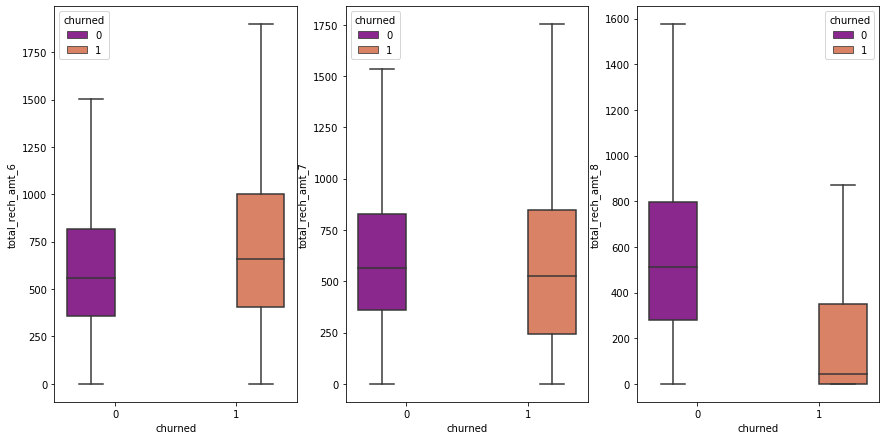

In [34]:
# Checking all the recharge amount for churned and non churned
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(data=data_hvc, y="total_rech_amt_6",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,2)
sns.boxplot(data=data_hvc, y="total_rech_amt_7",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,3)
sns.boxplot(data=data_hvc, y="total_rech_amt_8",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.show()

Here we can see that the **Total Recharge Amount** for `churned` users has dropped in the `8` month that is considered as the `action` phase month.

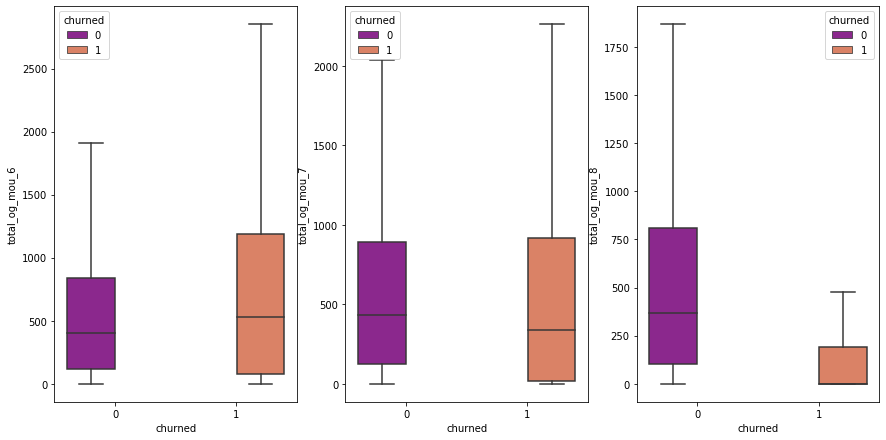

In [35]:
# outgoing_call = [col for col in data_hvc.columns if 'og' in col]
# outgoing_call
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(data=data_hvc, y="total_og_mou_6",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,2)
sns.boxplot(data=data_hvc, y="total_og_mou_7",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,3)
sns.boxplot(data=data_hvc, y="total_og_mou_8",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.show()

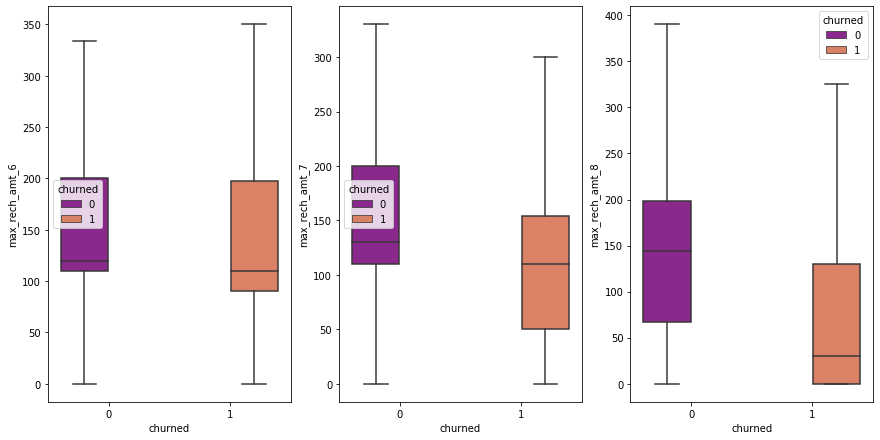

In [36]:
# outgoing_call = [col for col in data_hvc.columns if 'og' in col]
# outgoing_call
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(data=data_hvc, y="max_rech_amt_6",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,2)
sns.boxplot(data=data_hvc, y="max_rech_amt_7",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,3)
sns.boxplot(data=data_hvc, y="max_rech_amt_8",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.show()

We see that the `Max Recharge Amt` has dropped for the churned users in the action month

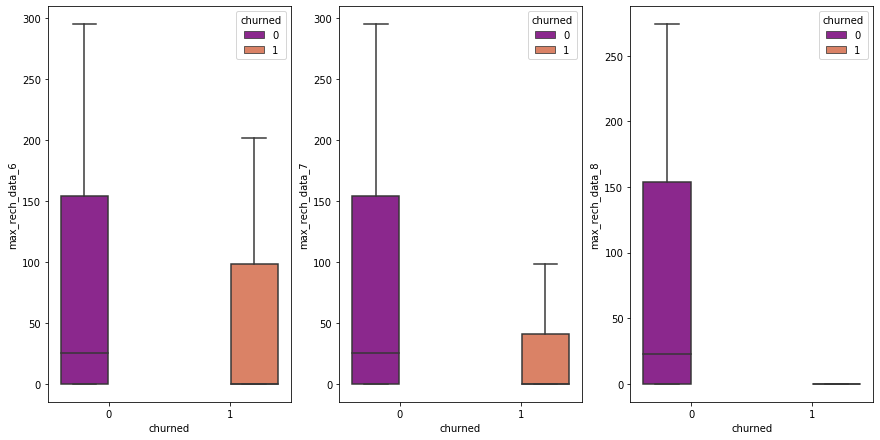

In [37]:
# outgoing_call = [col for col in data_hvc.columns if 'og' in col]
# outgoing_call
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(data=data_hvc, y="max_rech_data_6",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,2)
sns.boxplot(data=data_hvc, y="max_rech_data_7",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,3)
sns.boxplot(data=data_hvc, y="max_rech_data_8",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.show()

While the recharge amount dropped for the churned users, however, the data recharge was almost not done by the users who churned in the action month

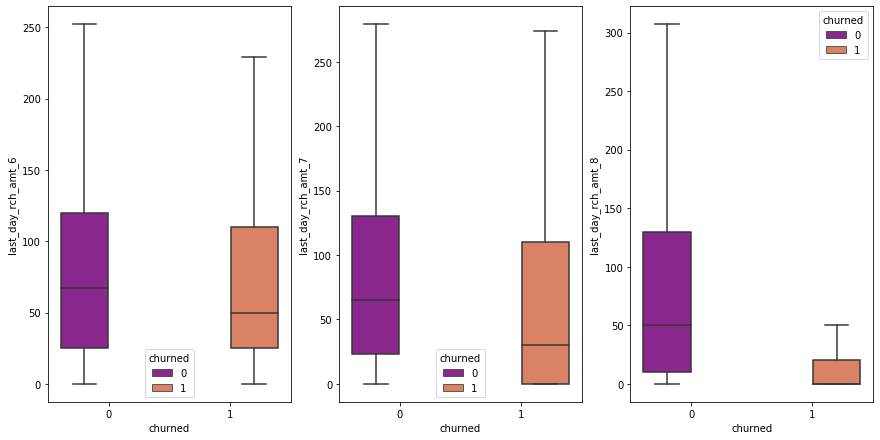

In [38]:
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(data=data_hvc, y="last_day_rch_amt_6",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,2)
sns.boxplot(data=data_hvc, y="last_day_rch_amt_7",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.subplot(2,4,3)
sns.boxplot(data=data_hvc, y="last_day_rch_amt_8",x="churned",hue="churned",
            showfliers=False,palette=("plasma"))
plt.show()

We see the users who have churned have the highest drop in recharge in the action month.

## 5. Data Preparation

### 5.1 Creating derived variables

From the dataset it is clear, that the users who have churned at the last month `(9th month)`, their usage started declining from the `8`th month, this means that their is some pattern that can be identified if we create new variables with the difference of `8` month data and the `avg` of valaues from the `6` & `7` month.

In [39]:
eigth_month_cols = sorted([col for col in data_hvc.columns if '8' in col])
seventh_month_cols = sorted([col for col in data_hvc.columns if '7' in col])
sixth_month_cols = sorted([col for col in data_hvc.columns if '6' in col])

# # We will run a loop from 0 to 46 as there are 47 columns for each month and derive a new variable for each of them.
for i in range(46):
    eigth_month_col = eigth_month_cols[i]
    seventh_month_col = seventh_month_cols[i]
    sixth_month_col = sixth_month_cols[i]
    data_hvc[eigth_month_col.replace('8','diff')] = data_hvc[eigth_month_col] - ((data_hvc[seventh_month_col] + data_hvc[sixth_month_col])/2)


data_hvc.shape

(29953, 243)

### 5.2 Outlier Treatment

Since there are a lot of columns and dealing with individual of them is a bit challenging is why we will be using `Sigma` approach to trat the outlier. Visit [link](https://www.lexjansen.com/nesug/nesug07/sa/sa16.pdf) for more details and look at point `2.2` for more details on this.

In [40]:
def cap_outliers(darray, x=1):

    """
    In Sigma approach, a value is considered outlier if it lies outside the mean by + or - x times sigma

    Here:
    Sigma - Standard Deviation
    x - An integer (We will consider this as the number of standard deviation away from the mean like 1STD, 2STD, 3STD)
    """

    mean = np.mean(darray)
    std = np.std(darray)

    floored = mean - x*std
    capped = mean + x*std

    darray[darray < floored] = floored
    darray[darray > capped] = capped

    return darray

In [41]:
for col in data_hvc.columns:
    if col != 'churned':
        data_hvc[col] = cap_outliers(data_hvc[col], 3)

### 5.3 Dropping all columns that are of churn month (9th month)

In [42]:
churn_cols = [col for col in data_hvc.columns if '9' in col]
data_hvc = data_hvc.drop(columns=churn_cols)

data_hvc.shape

(29953, 196)

### 5.4 Creating dummy variables

Above we identifid the categorical variables stored in variable `cat_cols`, we will be creating dummy variables out of them and later drop those `cat_cols`.

In [45]:

data_hvc_cols = data_hvc.columns

for cat_col in cat_cols:

    if cat_col not in data_hvc_cols:
        continue

    dummy = pd.get_dummies(data_hvc[cat_col], prefix=cat_col)
    data_hvc = pd.concat([data_hvc, dummy], axis=1)
    data_hvc.drop(columns=cat_col)

# pd.get_dummies(data_hvc['night_pck_user_6'], drop_first=True)

data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churned,arpu_diff,av_rech_amt_data_diff,fb_user_diff,ic_others_diff,isd_ic_mou_diff,isd_og_mou_diff,last_day_rch_amt_diff,loc_ic_mou_diff,loc_ic_t2f_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2t_mou_diff,loc_og_mou_diff,loc_og_t2c_mou_diff,loc_og_t2f_mou_diff,loc_og_t2m_mou_diff,loc_og_t2t_mou_diff,max_rech_amt_diff,max_rech_data_diff,monthly_2g_diff,monthly_3g_diff,night_pck_user_diff,offnet_mou_diff,og_others_diff,onnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,sachet_2g_diff,sachet_3g_diff,spl_ic_mou_diff,spl_og_mou_diff,std_ic_mou_diff,std_ic_t2f_mou_diff,std_ic_t2m_mou_diff,std_ic_t2o_mou_diff,std_ic_t2t_mou_diff,std_og_mou_diff,std_og_t2c_mou_diff,std_og_t2f_mou_diff,std_og_t2m_mou_diff,std_og_t2t_mou_diff,total_ic_mou_diff,total_og_mou_diff,total_rech_amt_diff,total_rech_data_diff,total_rech_num_diff,vol_2g_mb_diff,night_pck_user_6_-1.0,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_-1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_-1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_-1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_-1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_-1.0,fb_user_8_0.0,fb_user_8_1.0
0,0.0,0.0,0.0,197.385,214.816,213.803000,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,0.0,0.0,0.0,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,0.0,0.0,0.0,32.457179,33.887833,0.00,0.00,0.

In [74]:
def get_corr_features(df, target=None, thres=0.8):
    corr_df = df.copy()
    if target is not None:
        corr_df = df.drop(columns = target)
    
    corr = corr_df.corr()
    
    cols = corr.columns
    corr_feature = set()
    
    for i in range(len(cols)):
        for j in range(i):
            if abs(corr.iloc[i, j]) >= thres:
                corr_feature.add(cols[i])
    
    return corr_feature

In [78]:
def calculate_vif(x, target=None, thresh=5):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif_x = x.copy()
    
    if target is not None:
        vif_x = vif_x.drop(columns=target)
    
    features = vif_x.columns
    feature_indexs = np.arange(len(features))
    
    keep_dropping = True
    
    print('Calculating VIF')
    
    while keep_dropping:
        
        keep_dropping = False
        
        current_df_values = vif_x[features[feature_indexs]].values
    
        vifs = [variance_inflation_factor(current_df_values, i) for i in np.arange(current_df_values.shape[1])]
    
        max_vif = max(vifs)
        index = 0
        if max_vif > thresh:
            keep_dropping = True
            max_vif_index = vifs.index(max_vif)
            feature_indexs = np.delete(feature_indexs, max_vif_index)
            index += 1
            if (index % 10 == 0) or (index == len(x)):
                print('Feature left', len(feature_indexs))
    
    print('Returning', len(feature_indexs))
    return feature_indexs

In [76]:
drop_high_corr_columns = get_corr_features(data_hvc, 'churned')
data_hvc = data_hvc.drop(columns=drop_high_corr_columns)

In [80]:
column_idx_to_keep = calculate_vif(data_hvc, 'churned')
data_hvc = data_hvc[data_hvc.columns[column_idx_to_keep]]
data_hvc.shape

Calculating VIF
Returning 145


(29953, 145)

### 6.3 Train-Test Split

In [81]:
data_hvc.shape

(29953, 145)

In [82]:
train, test = train_test_split(data_hvc, train_size=0.8, random_state=4)

train.shape, test.shape

((23962, 145), (5991, 145))

In [83]:
X_train = train.drop(columns='churned')
y_train = train['churned']
X_test = test.drop(columns='churned')
y_test = test['churned']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23962, 144), (5991, 144), (23962,), (5991,))

## 7. Modeling


We will be creating four models, one will be without PCA and other three with PCA.



### 7.1 PCA

We will perform PCA on the train dataset to see how much of variance is explained by the components

In [84]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=4))])
pca_pipeline.fit(X_train)

data_hvc_pca = pca_pipeline.transform(X_train)

In [85]:
# Extracting the `pca` component from pipline
pca = pca_pipeline.named_steps['pca']
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4) * 100).sort_values()

0        8.11
1       14.48
2       18.99
3       22.92
4       26.15
5       29.10
6       31.69
7       34.11
8       36.32
9       38.33
10      40.26
11      42.12
12      43.94
13      45.73
14      47.43
15      49.05
16      50.60
17      52.11
18      53.53
19      54.92
20      56.29
21      57.61
22      58.89
23      60.14
24      61.36
25      62.55
26      63.73
27      64.89
28      66.00
29      67.11
30      68.18
31      69.22
32      70.24
33      71.24
34      72.21
35      73.14
36      74.03
37      74.90
38      75.75
39      76.60
40      77.42
41      78.22
42      79.00
43      79.75
44      80.47
45      81.18
46      81.87
47      82.54
48      83.19
49      83.82
50      84.43
51      85.04
52      85.63
53      86.20
54      86.77
55      87.30
56      87.81
57      88.31
58      88.77
59      89.21
60      89.64
61      90.06
62      90.48
63      90.88
64      91.29
65      91.68
66      92.07
67      92.44
68      92.81
69      93.17
70      93.51
71    

In this graph it is clear that 68 components are explaining almost 95% of the data

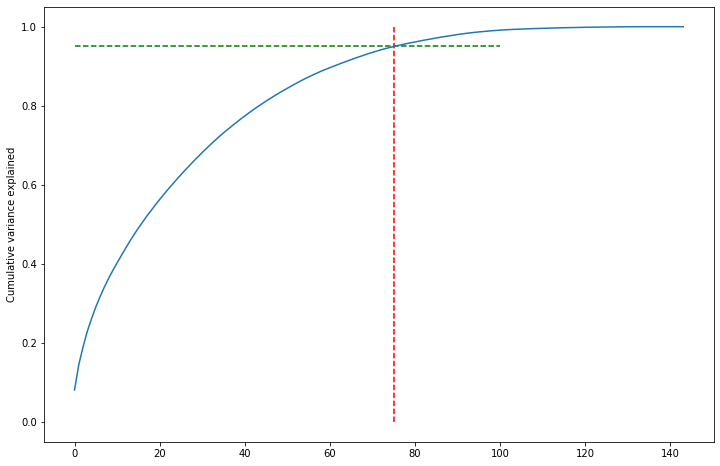

In [87]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Selecting top 75 variables with `SelectKBest`.

In [88]:
select_best_k = SelectKBest(f_classif, k=77)
select_best_k.fit_transform(X_train, y_train)
X_train = X_train[X_train.columns[select_best_k.get_support()]]
X_train.shape

(23962, 77)

In [93]:
X_test = X_test[X_test.columns[select_best_k.get_support()]]

### 7.2 LogisticRegression

In [107]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LogisticRegression(class_weight={0: 0.1, 1: 0.9}))
])

# lr = LogisticRegression(class_weight={0: 0.1, 1: 0.9})
pipeline_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [108]:
pipeline_lr.score(X_train, y_train).round(2)

0.84

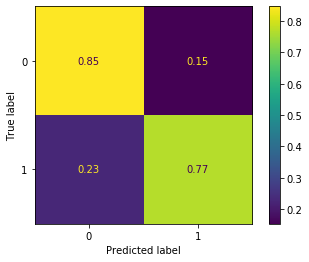

In [109]:
metrics.plot_confusion_matrix(lr, X_train, y_train, normalize='true')

In [110]:
y_lr_test_pred = lr.predict(X_test)
print(metrics.classification_report(y_true=y_test, y_pred=y_lr_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5488
           1       0.33      0.79      0.46       503

    accuracy                           0.84      5991
   macro avg       0.65      0.82      0.68      5991
weighted avg       0.92      0.84      0.87      5991



### 7.2 PCA and LogisticRegression

First we will try a model with 77 PCA components and since our classes are imabalced, we will be using hyperparameter tuning to get the best of the model

In [111]:
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', IncrementalPCA(n_components=77)), ('estmator', LogisticRegression(class_weight='balanced'))])
pipeline

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 IncrementalPCA(batch_size=None, copy=True, n_components=77,
                                whiten=False)),
                ('estmator',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [112]:
pipeline.fit(X_train, y_train)

pipeline.score(X_train, y_train).round(2)

0.8

Checking the accuracy on test data

In [113]:
y_pred = pipeline.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4370 1118]
 [  88  415]]


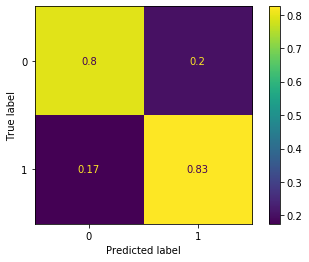

In [114]:
metrics.plot_confusion_matrix(pipeline, X_test, y_test, normalize='true')

In [115]:
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5488
           1       0.27      0.83      0.41       503

    accuracy                           0.80      5991
   macro avg       0.63      0.81      0.64      5991
weighted avg       0.92      0.80      0.84      5991



#### 7.2.1 Hyperparameter Tuning

If we see below, the classes are imbalnced with the ratio of 1:9 that is the dataset is highly skewed towards customers not churned.

To tackle this we will try tuning the parameter of 

In [116]:
# Check the spread of class to check the ration
round(y_train.value_counts(normalize=True) * 100, 2)

0    91.95
1     8.05
Name: churned, dtype: float64

In [117]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', IncrementalPCA()),
    ('estimator', LogisticRegression(class_weight={0: 0.1, 1: 0.9}))
]

params = {
    'pca__n_components': [61, 77],
}
folds = StratifiedKFold(shuffle=True, random_state=1)
model_cv = GridSearchCV(estimator=Pipeline(steps), param_grid=params, cv=folds, scoring='roc_auc', n_jobs=-1, verbose=-1)

In [118]:
model_cv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.6s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        IncrementalPCA(batch_size=None,
                                                       copy=True,
                                                       n_components=None,
                                                       whiten=False)),
                                       ('estimator',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                             

In [119]:
# cross validation results
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.883586,0.022079,0.043787,0.002582,61,{'pca__n_components': 61},0.876887,0.873544,0.885168,0.874090,0.874839,0.876906,0.004284,2
1,1.040146,0.198477,0.024481,0.005815,77,{'pca__n_components': 77},0.876813,0.875711,0.885502,0.873132,0.875251,0.877282,0.004280,1


In [120]:
print('Best achieved AUC:', model_cv.best_score_.round(2))
print('Best params:', model_cv.best_params_)

Best achieved AUC: 0.88
Best params: {'pca__n_components': 77}


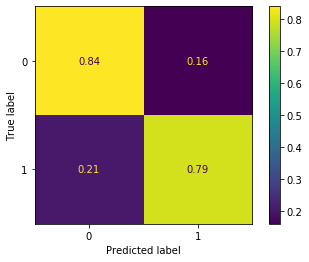

In [121]:
# Testing model on test data

y_test_pred = model_cv.predict(X_test)

metrics.plot_confusion_matrix(model_cv, X_test, y_test, normalize='true')

In [122]:
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5488
           1       0.31      0.79      0.45       503

    accuracy                           0.83      5991
   macro avg       0.64      0.81      0.67      5991
weighted avg       0.92      0.83      0.86      5991



In [123]:
y_test_pred_proba = model_cv.predict_proba(X_test)[:, 1]
print('Test AUC:', metrics.roc_auc_score(y_test, y_test_pred_proba).round(2))
print('Test Recall:', metrics.recall_score(y_true=y_test, y_pred=y_test_pred).round(2))

Test AUC: 0.88
Test Recall: 0.79


In [124]:
y_train_pred_proba = model_cv.predict_proba(X_train)[:, 1]
y_train_pred = model_cv.predict(X_train)
print('Train AUC:', metrics.roc_auc_score(y_train, y_train_pred_proba).round(2))
print('Train Recall:', metrics.recall_score(y_true=y_train, y_pred=y_train_pred).round(2))

Train AUC: 0.88
Train Recall: 0.79


### 7.3 Random Forest

1. Implementing `RandomForestClassifier` without PCA
2. Implementing `RandomForestClassifier` with PCA

We will be using, `GridSearchCV` for parameter tunning, however, since there are lots of parameters need to be tuned and to reduce the train time, we will tune all those params one by one and collect the best one for the final parameter tunning.

In [125]:
"""
Creating a helper function to train the random forest model and plot the score graph
"""

def train_random_forest_model(params, X_train, y_train):

    folds = StratifiedKFold(shuffle=True, random_state=1)

    estimators = RandomForestClassifier(class_weight={0: 0.01, 1: 0.9}, n_jobs=-1)

    random_forest_model_cv = GridSearchCV(estimator=estimators, cv=folds, param_grid=params,  scoring='roc_auc', n_jobs=-1, return_train_score=True ,verbose=1)

    random_forest_model_cv.fit(X_train, y_train)

    for key in params.keys():
        hyperparameter = key
        break

    results = random_forest_model_cv.cv_results_

    # plotting accuracies for parameters
    plt.figure(figsize=(12,5))
    plt.plot(results["param_"+hyperparameter], results["mean_train_score"], label="training accuracy")
    plt.plot(results["param_"+hyperparameter], results["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.6min finished


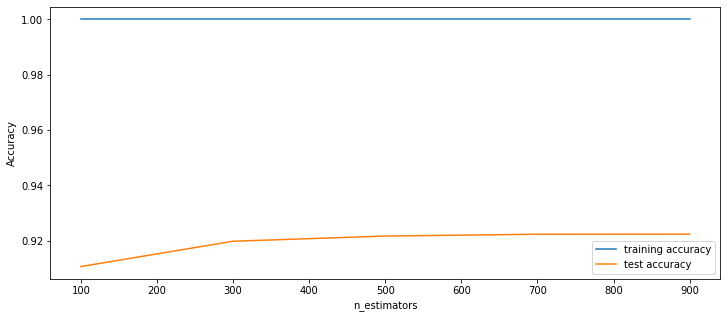

In [506]:
# No of estimators

params = {
    'n_estimators': range(100, 1000, 200)
}

train_random_forest_model(params, X_train, y_train)

Here value `500` and `700` seems to have a peek after which the score starts to plateau

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished


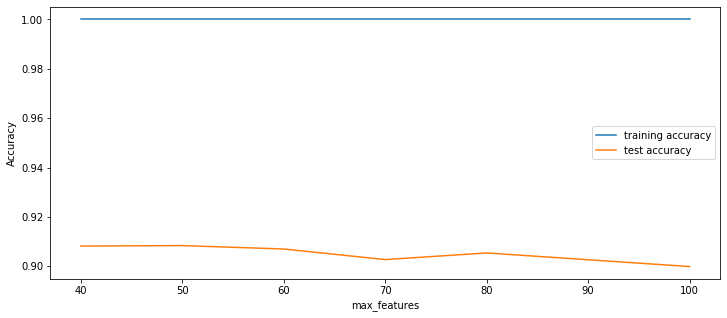

In [507]:
# Max features

params = {
    'max_features': [40, 50, 60, 70, 80, 100]
}

train_random_forest_model(params, X_train, y_train)


We see two spikes here, `40` and one at `50`, we try both in `GridSearchCV`.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   35.2s finished


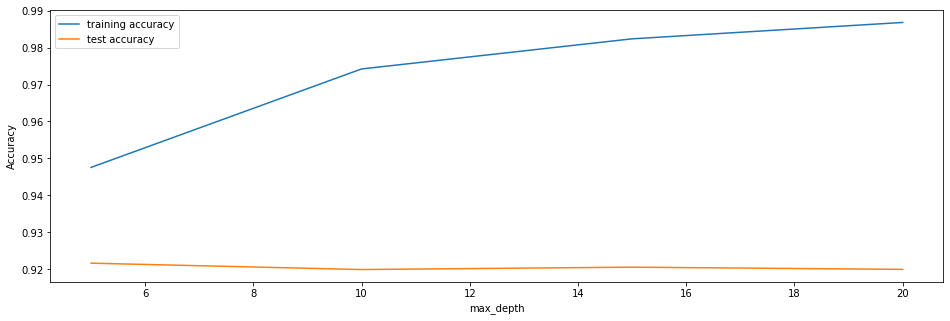

In [302]:
params = {
    'max_depth': [5, 10, 15, 20]
}

train_random_forest_model(params, X_train, y_train)

Apparently the train score seems to be increasing till depth `10` but the test score is decreasing. However, we see two spikes in test score one at `5` and another at around `15`, we will try both 5 and 15 in `GridSearchCV`.

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   45.9s finished


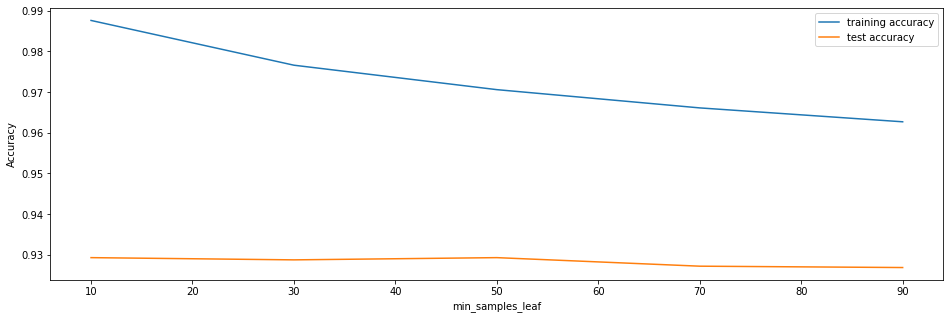

In [303]:
params = {
    'min_samples_leaf': range(10, 100, 20)
}

train_random_forest_model(params, X_train, y_train)

Point `40` and `50` seems to be good fit

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   50.0s finished


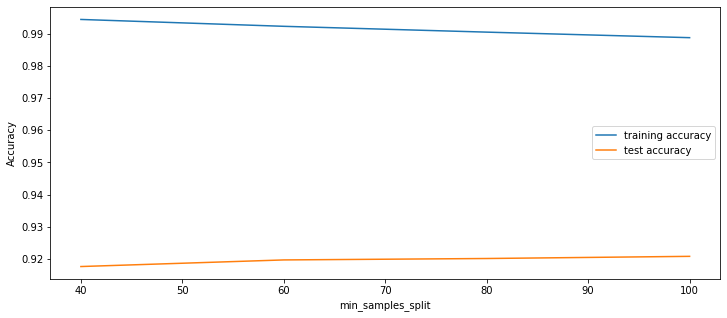

In [509]:
params = {
    "min_samples_split": [40, 60, 80, 100]
}

train_random_forest_model(params, X_train, y_train)

The value of `60` seems to be a good fit that has a balance of both train and test accuracy

In [126]:
# RandomgForestClassifier without PCA
steps = [
    # ('pca', IncrementalPCA()),
    ('estimator', RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1))
]

params = {
    # 'pca__n_components': [61, 77],
    'estimator__n_estimators': [500, 700],
    'estimator__max_features': [40, 50],
    'estimator__max_depth': [5, 15],
    'estimator__min_samples_leaf': [40, 50],
    'estimator__min_samples_split': [60]
}

folds = StratifiedKFold(shuffle=True, random_state=1)

# estimators = RandomForestClassifier(class_weight={0: 0.01, 1: 0.9}, n_jobs=-1)
pipeline = Pipeline(steps=steps)

random_forest_model_cv = GridSearchCV(estimator=pipeline, cv=folds, param_grid=params, scoring='roc_auc', return_train_score=True, n_jobs=-1, verbose=1)

# random_forest_model_cv.get_params().keys()
random_forest_model_cv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('estimator',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight={0: 0.1,
                                                                             1: 0.9},
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                            

In [127]:
random_forest_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 119.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('estimator',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight={0: 0.1,
                                                                             1: 0.9},
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                            

In [128]:
# cross validation results
pd.DataFrame(random_forest_model_cv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,param_estimator__max_features,param_estimator__min_samples_leaf,param_estimator__min_samples_split,param_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,109.682742,0.465669,0.313661,0.001571,5,40,40,60,500,"{'estimator__max_depth': 5, 'estimator__max_fe...",0.922825,0.920957,0.919463,0.914246,0.908983,0.917295,0.005042,9,0.934018,0.933203,0.933898,0.936374,0.936299,0.934759,0.001318
1,155.857847,1.397361,0.478590,0.084968,5,40,40,60,700,"{'estimator__max_depth': 5, 'estimator__max_fe...",0.923301,0.920850,0.919377,0.914335,0.908529,0.917278,0.005266,10,0.934132,0.933167,0.933856,0.936247,0.936266,0.934734,0.001282
2,112.914099,0.265615,0.316073,0.001622,5,40,50,60,500,"{'estimator__max_depth': 5, 'estimator__max_fe...",0.922888,0.920806,0.919370,0.913912,0.908146,0.917024,0.005342,12,0.933173,0.932724,0.933009,0.935958,0.935604,0.934094,0.001390
3,157.042260,0.813119,0.420802,0.004112,5,40,50,60,700,"{'estimator__max_depth': 5, 'estimator__max_fe...",0.923100,0.920328,0.919567,0.913934,0.908400,0.917066,0.005258,11,0.933594,0.932838,0.933137,0.935844,0.935789,0.934240,0.001309
4,139.852224,0.665607,0.278929,0.049099,5,50,40,60,500,"{'estimator__max_depth': 5, 'estimator__max_fe...",0.922229,0.919535,0.918793,0.914267,0.907961,0.916557,0.005003,14,0.934041,0.933578,0.933773,0.936661,0.936230,0.934857,0.001313


In [129]:
random_forest_model_cv.best_estimator_

Pipeline(memory=None,
         steps=[('estimator',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight={0: 0.1, 1: 0.9},
                                        criterion='gini', max_depth=15,
                                        max_features=40, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=40,
                                        min_samples_split=60,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=700, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [130]:
print('Best achieved AUC:', random_forest_model_cv.best_score_.round(2))
print('Best params:', random_forest_model_cv.best_params_)

Best achieved AUC: 0.92
Best params: {'estimator__max_depth': 15, 'estimator__max_features': 40, 'estimator__min_samples_leaf': 40, 'estimator__min_samples_split': 60, 'estimator__n_estimators': 700}


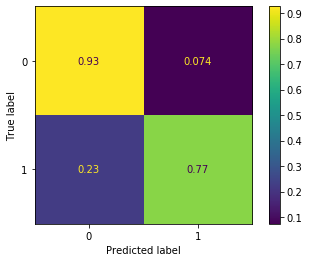

In [131]:
# Testing model on test data
metrics.plot_confusion_matrix(random_forest_model_cv, X_test, y_test, normalize='true', include_values=True)

In [132]:
y_test_pred_proba = random_forest_model_cv.predict_proba(X_test)[:, 1]
y_test_pred = random_forest_model_cv.predict(X_test)
print('Test AUC:', metrics.roc_auc_score(y_test, y_test_pred_proba).round(2))
print('Test Recall:', metrics.recall_score(y_true=y_test, y_pred=y_test_pred).round(2))

Test AUC: 0.93
Test Recall: 0.77


In [133]:
y_train_pred_proba = random_forest_model_cv.predict_proba(X_train)[:, 1]
y_train_pred = random_forest_model_cv.predict(X_train)
print('Train AUC:', metrics.roc_auc_score(y_train, y_train_pred_proba).round(2))
print('Train Recall:', metrics.recall_score(y_true=y_train, y_pred=y_train_pred).round(2))

Train AUC: 0.97
Train Recall: 0.85


In [134]:
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5488
           1       0.49      0.77      0.60       503

    accuracy                           0.91      5991
   macro avg       0.73      0.85      0.78      5991
weighted avg       0.94      0.91      0.92      5991



## Recommendations

We will extract the important variables from the `RandomForestClassifer`.

In [136]:
random_forest = random_forest_model_cv.best_estimator_.named_steps['estimator']

In [137]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": random_forest.feature_importances_
})

In [177]:
imp_df.sort_values(by="Imp", ascending=False, inplace=True)
imp_df.head(8)

,Varname,Imp
89,total_ic_mou_8,0.159983
17,roam_og_mou_8,0.122486
14,roam_ic_mou_8,0.077458
59,total_og_mou_8,0.069452
104,total_rech_amt_8,0.046997
110,last_day_rch_amt_8,0.043024
5,arpu_8,0.034533
191,total_rech_amt_diff,0.029292


In [148]:
imp_df.shape

(213, 2)

#### Recommendations

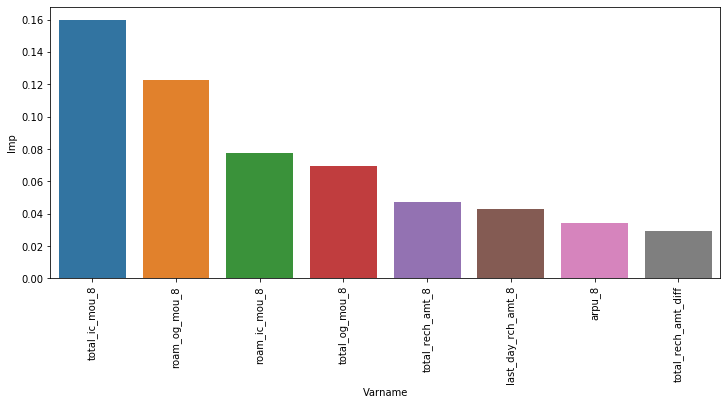

In [176]:
plt.figure(figsize=(12, 5))
figure = sns.barplot(x='Varname',y='Imp', data=imp_df.head(8))
figure.set_xticklabels(rotation=90, labels=imp_df.head(8).Varname)
plt.show()

### Conclusion

1. Churned customers have more incoming call minutes than Non-Churn users

2. Churned customers have more roaming outgoing calls than any Non-Churn users. Now roaming call brings more revenue and is why it is suggested to give competetive roaming charges.

3. `Average Revenue per User` of Churned user is higher than the Non-Churned users this could also mean that the user maybe using telecom services from a long time.



**The final conclusion to draw is that the Churned users are more traveling out of the country because of which they have higher roaming incoming/outgoing calls. This leads such users to do more recharge which leads to revenue per user higher than the Non-Churned users, is why it is suggested that the telecom provider must provide competetive billing/packages to these HVC Customers to retain them.**



**Estimator Conclusion**

Both of the Estimators are performing good, if interpretability is important, than `RandForestClassifier` is a better option and on the other hand where interpretability isn't important, `LogisticRegression` with `PCA` components would be a better option.